# 第3章 数据类型

* Double.POSITIVE_INFINITY
* Double.NEGATIVE_INFINITY
* Double.NaN 表示非数值，不能比较大小

In [10]:
System.out.println(Double.POSITIVE_INFINITY);
System.out.println(Double.NEGATIVE_INFINITY);
System.out.println(Double.NaN);

Infinity
-Infinity
NaN


In [9]:
// 检测一个数字是否是NaN
Double x = Double.NaN;
if(Double.isNaN(x)){
    System.out.println("yes");
}

yes


In [37]:
Double x = 10.0;
Double y = Double.POSITIVE_INFINITY;
System.out.println(x > y);

false


## char类型

\u+十六进制 
* 表示Unicode字符; 
* 表示特殊的转义字符 <br>
    \n \u000a <br>
    \' \u0027<br>

In [28]:
System.out.println("\u2122");
System.out.println("\u0027");

™
'



## final类常量

能够在一个类中的多个方法中使用。使用static final设置一个类常量。

## 位运算符

&，|，^(异或)，~(非)，>>，<<

In [42]:
// 判断整形变量n如果用二进制表示，其倒数第4位是否为1
int n = 0b101000;
System.out.println((n & 0b1000) / 0b1000);
n = 0b10001;
System.out.println((n & 0b1000) / 0b1000);

1
0


<font color='#f0110c' size=3>由于int占4字节，long占8字节，所以在使用右移左移运算符时，其右侧参数需要进行模32(int)，模64(long)的运算。如1<<35与1<<3, 8是相同的。</font>

【补充】在Math类中，为了达到最快的性能，所有的方法都使用计算机浮点单元中的例程。如果要求结果在所有平台上都得到相同的结果，应使用StrictMath.

## 数据类型的转化

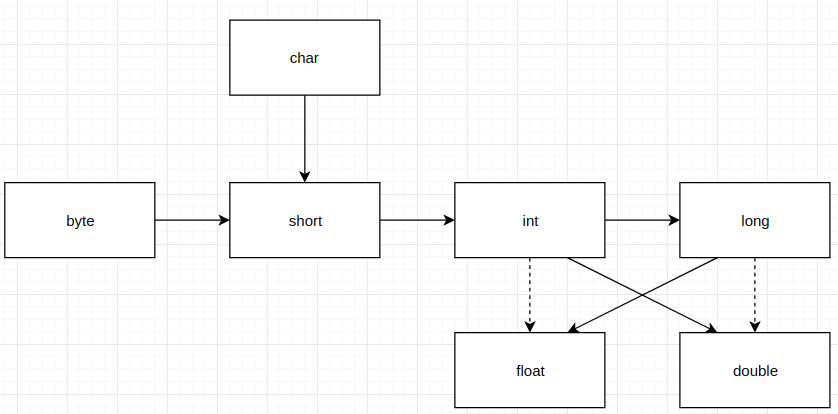

实箭头不会丢失精度，虚箭头会。

## 枚举类型

变量的取值只限于某个集合内或者为null。

In [46]:
enum Size {SMALL, MEDIUM, LARGE, EXTRA_LARGE}
Size s = Size.SMALL;
System.out.println(s);

SMALL


## 不可变字符串

String类对象称为不可变字符串，它不提供修改字符串的方法。这种字符串可以共享。换言之，可以想象这种字符串存放在公共的存储池中，字符串变量指向存储池中相应的位置。如果复制一个字符串，原始字符串与复制的字符串共享相同的字符。

1. 检查字符串相等：
    * s.eqauls(t)
    * == <br>
    如果两者存放的位置相同，返回true，否则false。
    
【注意】只有字符串常量是共享的，而+或substring等操作产生的结果不是共享的。

2. char序列的代码点与代码单元


* Java字符串由char序列组成。
* char数据类型是一个采用UTF-16编码表示Unicode代码点的代码单元。大多数常用Unicode字符使用一个代码单元，补充字符需要一对代码单元表示。
* String.length返回字符串所需的代码单元数量。
* 获取代码点的数量(字符串实际长度)：s.codePointCount(0, s.length());
* s.charAt(n)：返回位置n的代码单元。
* 获取第i个代码点：<br>
    `int index = s.offsetByCodePoints(0, i); 
    int cp = s.codePointAt(index)`

In [7]:
String s = "你好，世界！";
System.out.println(s.length());

System.out.println(s.charAt(1));

int index = s.offsetByCodePoints(0, 1);
int cp = s.codePointAt(index);
System.out.println(index+" "+cp);

6
好
1 22909


3. StringBuilder与StringBuffer
    * StringBuilder的前身是StringBuffer
    * StringBuffer效率稍低，但允许多线程的方式添加或删除字符
    * 若在单线程中应使用StringBuilder替代它。

In [17]:
StringBuilder sb = new StringBuilder();
sb.appendCodePoint(22909);
System.out.println(sb);

好


## 字符串的读取

* nextLine()：读取一行，行中可以包含空格。
* next()：读取一个单词

* 创建格式化的字符串：String.format()

In [20]:
String s = String.format("Hello, %s. Next year, you will be %d","小明", 23);
System.out.println(s);

Hello, 小明. Next year, you will be 23


## 文件输入与输出

* 从文件中读取：<br>
    Scanner in = new Scanner(Paths.get("Myfile.txt"));
* 输出到文件：<br>
    PrintWriter out = new PrintWriter("Myfile.txt")

In [23]:
// 这种只会读入参数作为数据
Scanner in = new Scanner("Myfile.txt");
System.out.println(in.next());

Myfile.txt


## 大数运算

* BigInteger：实现了任意精度的整数运算
* BigDecimal：实现了任意精度的浮点运算

【注意】加减乘除运算需要使用相应的函数。

## 数组拷贝

In [33]:
// 通常用于增大数组大小
int[] a = {1,2,3,4,5,6,7,8,9};
int[] copyA = Arrays.copyOf(a, 2 * a.length);
System.out.println(copyA+" "+a);
for (int e : a){
    System.out.print(e+" ");
}
System.out.println();
for (int e : copyA){
    System.out.print(e+" ");
}

[I@336527c4 [I@2cbe8a44
1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 8 9 0 0 0 0 0 0 0 0 0 

# 对象与类

1. 只有类成员变量会被赋初值，局部变量不会。
2. final修饰对象引用，是说该引用的指向不可变，其内容仍可改变。
3. 静态方法不能操作对象，但可以访问自身类中的静态域。
4. 类定义中的初始化块：<br>
    只要实例化对象，该初始化块就会被调用。初始化块先于构造器调用。<br>
   静态初始化块可以初始化静态域。<br>
5. 包<br>
    一个类可以使用所属包中的所有类，以及其他包中的共有类。<br>
    当代码中使用多个同名但不同包的类时，需要使用包路径来具体指定是哪个类。<br>
6. 导入静态方法和静态域
7. 包的作用域：<br>
    public：可被任何类使用<br>
    provate：只能被定义它的类使用<br>
    默认：可被同一个包中所有方法访问 <br>

In [ ]:
8. 类路径
    所有的类文件都存放在/home/user/classdir中，所有的jar包放在/home/user/archives中。
    则类路径设置为：/home/user/classdir:.:/home/user/archives/archive.jar
    javac编译器总是在当前目录中查找文件，而Java虚拟机仅在类路径中有“.”目录时才会查看当前目录。
    虚拟机搜寻某个类文件的查找顺序：
        系统类文件jre/lib和jre/lib/ext
        /home/user/classdir/com/horstmann/corejava/Employee.class
        com/horstmann/corejava/Employee.class 从当前目录开始
        com/horstmann/corejava/Employee.class inside /home/user/archives/archive.jar
    类路径包含三部分：基目录 /home/user/classdir；当前目录(.)；jar文件/home/user/archives/archive.jar
    类路径的设置：
        java -classpath /home/user/classdir:.:/home/user/archives/archive.jar

# 继承

## ArrayList

ArrayList的容量会按需增大，当存储空间不够，系统会将所有元素复制到一个更大的数组中。在定义ArrayList对象时可以指定容量，当可以预判元素的个数时，可以在添加元素之前调用ensureCapasity()固定数组的容量。当出现ArrayList出现多余空间，可以使用trimToSize()将存储空间调整为当前元素数量所需的存储空间数目。

## 枚举类

In [ ]:
enum Size{
    // 必须在首行
    SMALL("S"), MEDIUM("M"), LARGE("L"),EXTRA_LARGE("XL");

    private String abbreviation;
    private Size(String abbreviation){this.abbreviation = abbreviation;}
    public String getAbbreviation(){ return abbreviation;}
}

public class No1 {
    public static void main(String[] args) {
        Scanner in = new Scanner(System.in);
        String input=in.next().toUpperCase();
        Size size = Enum.valueOf(Size.class, input); // input是全称如small不是S
        System.out.println("size = "+size);
        System.out.println("abbreviation="+size.getAbbreviation());
        // Size.values()返回包含全部枚举值的数组
        for (Size value : Size.values()){
            System.out.print(value+" ");
        }
        System.out.println();
        // 返回枚举常量的位置
        System.out.println(Size.MEDIUM.ordinal());
    }
}

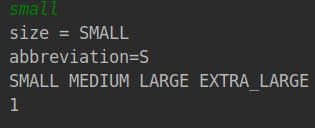

## 反射

In [ ]:
class User{
    private int age;
    private String uname;
    public User(){}
}

public class No1 {
    public static void main(String[] args) {
        try {
            Class<?> user = Class.forName("java_tech.User");
            System.out.println("user1 = " + user.hashCode());

            Class<?> user1 = Class.forName("java_tech.User");
            System.out.println("user2 = " + user1.hashCode());
        } catch (Exception e) {
            e.printStackTrace();
        }
    }
}

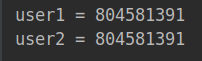

同一个对象只会被加载一次。

Class对象的获取方式：
* 对象.getClass()
* 对象类型.class
* Class.forName()

通过这三种方式获取同一个类型的class对象将会是同一个。

class, interface, enum, anotation, 8种基本数据，void都可以通过反射获取。

可以获取有参的构造函数进行对象的初始化。有参构造器.newInstance();<br>
获取有参的成员函数，通过method.invoke()来使用。

In [ ]:
--> java.lang.Class
    static Class forName(String className); // 返回className的Class对象。
    Object newInstance(); //返回这个类的实例
    
--> java.lang.reflect.Constructor
    Object newInstance(Object[] args); // 通过带参构造器构造类的实例

In [ ]:
--> java.lang.Class
    Field[] getField() // 返回本类及超类的公有域
    Field[] getDeclaredFields() // 返回本类的全部域
    【注意】域中不包括基本类型和数组类型。
    
    Method[] getMethod() // 返回本类及超类的共有方法
    Method[] getDeclareMethods() // 返回本类或接口的全部方法
    
    Constructor[] getConstructors() // 返回本类所有的共有构造器
    Constructor[] getDeclaredConstructors() //返回所有构造器
    
----------------------------------------------------------------
--> java.lang.reflect.Field, java.lang.reflect.Method, java.lang.reflect.Construcotr
    Class getDeclaringClass() // 
    Class[] getExceptionTypes() (在Constructor和Method类中)
    int getModifiers() 
    String getName() // 返回构造器名，方法名，域名的字符串
    Class[] getParameterTypes() (在Constructor和Method类中) // 获取参数类型
    Class getReturnType() (在Method类中) // 返回方法的返回值类型
    Class getType() (在Field类中) // 返回Field定义时的数据类型。
    

--> java.lang.reflect.Modifier
    static String toString(int modifiers)
    static boolean isAbstract(int modifiers)
    static boolean isFinal(int modifiers)
    static boolean isInterface(int modifiers)
    static boolean isNative(int modifiers)
    static boolean isPrivate(int modifiers)
    static boolean isProtected(int modifiers)
    static boolean isPublic(int modifiers)
    static boolean isStatic(int modifiers)
    static boolean isStrict(int modifiers)
    static boolean isSynchronized(int modifiers)
    static boolean isVolatile(int modifiers)
    

In [ ]:
public class No1 {
    public static void main(String[] args) {
        String name;
        Scanner in = new Scanner(System.in);
        System.out.println("Enter class name (e.g. java.util.Date)");
        name = in.next();

        try {
            Class<?> cl = Class.forName(name);
            Class<?> supercl = cl.getSuperclass();
            String modifiers = Modifier.toString(cl.getModifiers());
            if (modifiers.length() > 0)
                System.out.print(modifiers+" ");
            System.out.print("class "+name);
            if (supercl != null && supercl != Object.class)
                System.out.print(" extends "+supercl.getName());

            System.out.print("\n{\n");
            printConstructors(cl);
            System.out.println();
            printMethods(cl);
            System.out.println();
            printFields(cl);
            System.out.println("}");
        } catch (ClassNotFoundException e ){
            e.printStackTrace();
        }
    }

    public static void printConstructors(Class cl){
        Constructor[] constructors = cl.getDeclaredConstructors();
        for (Constructor c : constructors){
            String name = c.getName();
            System.out.print("   ");
            String modifiers = Modifier.toString(c.getModifiers());
            if (modifiers.length() > 0)
                System.out.print(modifiers+" ");
            System.out.print(name+"(");

            // 打印参数类型
            Class[] paramTypes = c.getParameterTypes();
            for (int j = 0; j < paramTypes.length; j++){
                if (j > 0)
                    System.out.print(", ");
                System.out.print(paramTypes[j].getName());
            }
            System.out.println(");");
        }
    }

    public static void printMethods(Class cl){
        Method[] methods = cl.getDeclaredMethods();
        for (Method m : methods){
            Class<?> returnType = m.getReturnType();
            String name = m.getName();

            System.out.print("   ");
            // 打印modifiers，return type，method name
            String modifiers = Modifier.toString(m.getModifiers());
            if (modifiers.length() > 0)
                System.out.print(modifiers+" ");
            System.out.print(returnType.getName()+" "+name+"(");

            // 打印参数类型
            Class<?>[] paramTypes = m.getParameterTypes();
            for (int j = 0; j < paramTypes.length;  j++){
                if (j > 0)
                    System.out.print(", ");
                System.out.print(paramTypes[j].getName());
            }
            System.out.println(");");
        }
    }

    public static void printFields(Class cl){
        Field[] fields = cl.getDeclaredFields();
        for (Field f : fields){
            Class<?> type = f.getType();
            String name = f.getName();
            System.out.print("   ");

            String modifiers = Modifier.toString(f.getModifiers());
            if (modifiers.length() > 0)
                System.out.print(modifiers+" ");
            System.out.println(type.getName()+" "+name+";");
        }
    }
}

In [ ]:
// 运行结果
public class java.util.Date
{
   public java.util.Date(int, int, int, int, int, int);
   public java.util.Date();
   public java.util.Date(int, int, int, int, int);
   public java.util.Date(java.lang.String);
   public java.util.Date(long);
   public java.util.Date(int, int, int);

   public void setYear(int);
   public int getMonth();
   public void setMonth(int);
   public void setDate(int);
   public int getDay();
   public int getHours();
   public void setHours(int);
   public int getMinutes();
   public void setMinutes(int);
   public void setSeconds(int);
   private final long getTimeImpl();
   static final long getMillisOf(java.util.Date);
   private static final java.lang.StringBuilder convertToAbbr(java.lang.StringBuilder, java.lang.String);
   public java.lang.String toLocaleString();
   public java.lang.String toGMTString();
   public int getTimezoneOffset();
   private final sun.util.calendar.BaseCalendar$Date getCalendarDate();
   private static final sun.util.calendar.BaseCalendar getCalendarSystem(long);
   private static final sun.util.calendar.BaseCalendar getCalendarSystem(int);
   private static final sun.util.calendar.BaseCalendar getCalendarSystem(sun.util.calendar.BaseCalendar$Date);
   private static final synchronized sun.util.calendar.BaseCalendar getJulianCalendar();
   public void setTime(long);
   public int getDate();
   public int getSeconds();
   public java.time.Instant toInstant();
   public static long UTC(int, int, int, int, int, int);
   public int getYear();
   public long getTime();
   public boolean before(java.util.Date);
   public boolean after(java.util.Date);
   public boolean equals(java.lang.Object);
   public java.lang.String toString();
   public int hashCode();
   public java.lang.Object clone();
   public int compareTo(java.util.Date);
   public volatile int compareTo(java.lang.Object);
   public static java.util.Date from(java.time.Instant);
   private void readObject(java.io.ObjectInputStream);
   private void writeObject(java.io.ObjectOutputStream);
   private final sun.util.calendar.BaseCalendar$Date normalize();
   private final sun.util.calendar.BaseCalendar$Date normalize(sun.util.calendar.BaseCalendar$Date);
   public static long parse(java.lang.String);

   private static final sun.util.calendar.BaseCalendar gcal;
   private static sun.util.calendar.BaseCalendar jcal;
   private transient long fastTime;
   private transient sun.util.calendar.BaseCalendar$Date cdate;
   private static int defaultCenturyStart;
   private static final long serialVersionUID;
   private static final [Ljava.lang.String; wtb;
   private static final [I ttb;
}

In [ ]:
读取域中的值：
Employee harry = new Employee("Harry Hacker",35000,10,1,1989);
Class cl = harry.getClass();
Field f = cl.getDeclaredField("name");
f.setAccessible(true); // 覆盖访问控制，使得值可被读取
Object v = f.get(harry); // 对于基本类型要使用像f.getDouble()等，它完成自动装箱，返回一个Object

f.set(obj, value); // 将obj对象的f域设置为新值

In [ ]:
--> java.lang.reflect.AccessibleObject
    void setAccessible(boolean flag);
    boolean isAccessible();
    static void setAccessible(AccessibleObject[] array, boolean flag); //设置数组可访问标志的方法